# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

****
## Preliminary Analysis

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\musht\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


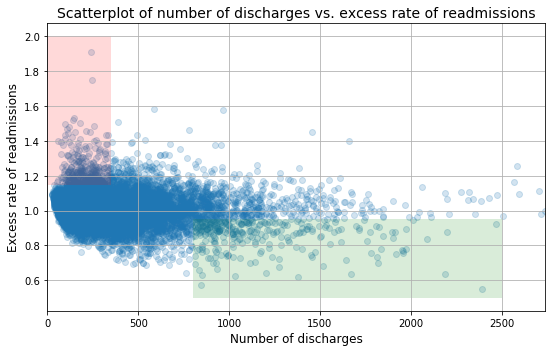

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()
# below is my code


****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn

In [6]:
df = pd.read_csv('data/cms_hospital_readmissions.csv')
print ('shape', df.shape, 'info ', df.info(), 'describle', df.describe(), ' columns ', df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB
shape (16860, 12) info  None describle        Provider Number     Footnote  Excess Readmission Ratio  \
count     16860.000000  3129.000000              13731.000000   
mean     263516.943654     2.9054

In [7]:
# get rid of null values with number of discharges 0. Excess Readmission Ratio is OK
df= clean_hospital_read_df.sort_values('Number of Discharges')
df=df[df['Number of Discharges']>0.0]
df
df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

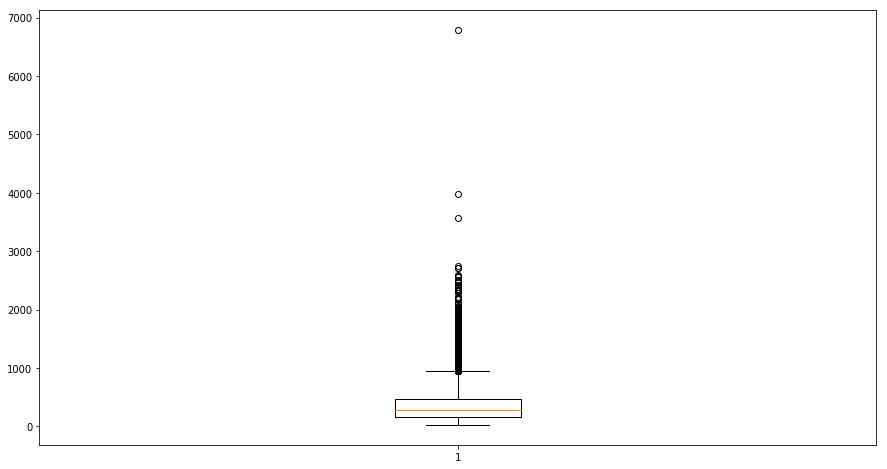

In [8]:
# Check for outliers
#Identifying the outliers
plt.figure(figsize=(15,8))
plt.boxplot(df['Number of Discharges'])
plt.show()
# it seems there are three outliers. Let us remove them with mean Number of Discharges


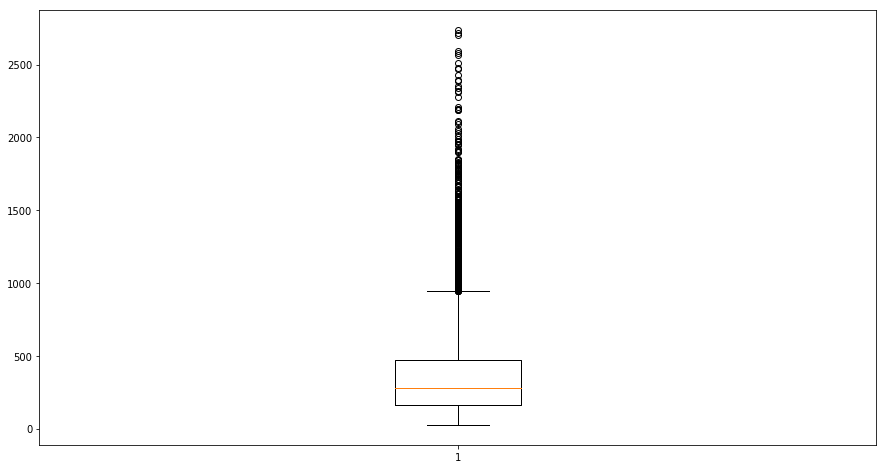

In [9]:
# delete three outliers
df=df[df['Number of Discharges']<3500]

#check again

plt.figure(figsize=(15,8))
plt.boxplot(df['Number of Discharges'])
plt.show()
# Three outliers removed


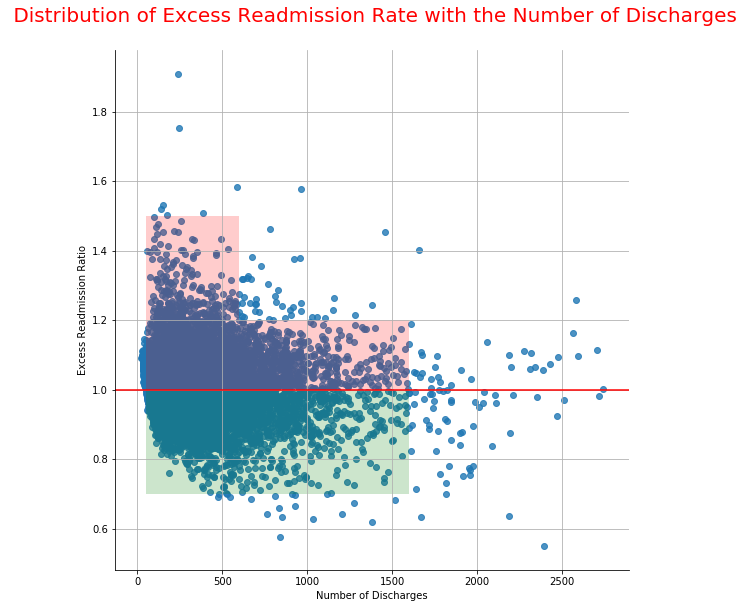

In [10]:
# Let us look at the data visually
import seaborn as sns
sns.lmplot('Number of Discharges','Excess Readmission Ratio',df,fit_reg=False,height=8)
plt.title(" Distribution of Excess Readmission Rate with the Number of Discharges\n", size = 20, color='r')

plt.fill_between([50,1600],1.,1.2,facecolor='red', alpha = .2, interpolate=True)
plt.fill_between([50,600],1.2,1.5,facecolor='red', alpha = .2, interpolate=True)

plt.fill_between([50,1600],.8,1.0,facecolor='green', alpha = .2, interpolate=True)
plt.fill_between([50,1600],.8,.7,facecolor='green', alpha = .2, interpolate=True)


plt.grid(True)
fig.tight_layout()
plt.axhline(y=1,color='r')
plt.show()


# insight: The number of discharges has no visible impact on the excess rate of readmission. They are approximately equally 
#  distribued over EXcess Readmission Rate of 1 - the shaded red area is above 1 and green shaded area below 1.



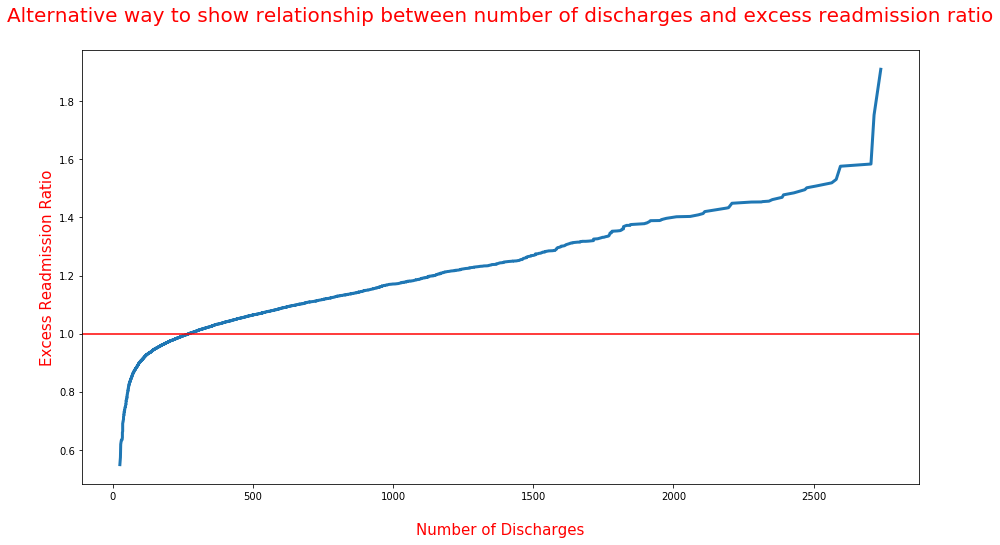

In [11]:
#Alternative plot for showing relationship between number of discharges and excess readmission ratio

import matplotlib.pyplot as plt

hold=df['Excess Readmission Ratio']
bins=np.sort(hold)
xx=df['Number of Discharges']
xx=np.sort(xx)
plt.figure(figsize=(15,8))
plt.title('Alternative way to show relationship between number of discharges and excess readmission ratio\n', size=20,color='r')
plt.xlabel('\nNumber of Discharges', size=15,color='r')
plt.ylabel("Excess Readmission Ratio",size=15, color='r')
plt.plot(xx,bins, linestyle='-', linewidth=3)
plt.axhline(y=1, color='r')
plt.show()

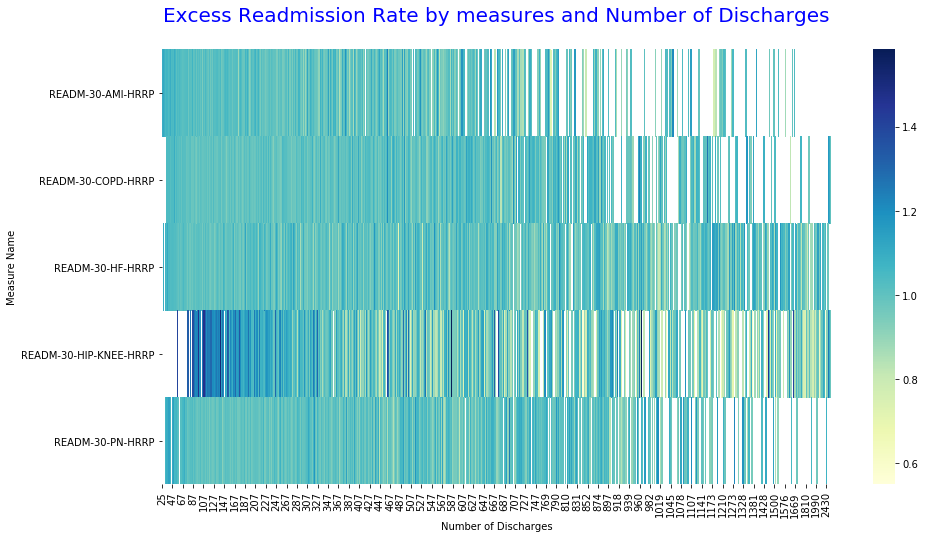

In [12]:
# There are five measures in the dataset and look at the individual measures and see whether they are related to the number 
#of discharges
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
heat_data=df[['Number of Discharges','Excess Readmission Ratio','Measure Name']]
heat_data_final=pd.pivot_table(heat_data,values='Excess Readmission Ratio',index=['Measure Name'],columns='Number of Discharges')
plt.figure(figsize=(15,8))
plt.title("Excess Readmission Rate by measures and Number of Discharges\n ",size=20, color='blue')
sns.heatmap(heat_data_final, cmap="YlGnBu")

# Insights: The plot below indicates that the measure - READM-30-HIP-KNEE-HRRP - has the highest rate of excess readmission
# concentrated on the lower number of discharges. Other measures needs to investigate by using correlation.

In [13]:
# Look at the mean Excess Readmission Ratio for each measure

mean_excess_ratio=df.groupby('Measure Name')['Measure Name','Excess Readmission Ratio'].mean().to_dict()
mean_discharges=df.groupby('Measure Name')['Measure Name','Number of Discharges'].mean().to_dict()
print (' mean_excess_ratio for \n',mean_excess_ratio['Excess Readmission Ratio'])
print (' mean_discharges for \n', mean_discharges['Number of Discharges'])

# The highest mean number of excess readmission ratio  as well as highest mean discharges is in the measure 
#'READM-30-HIP-KNEE-HRRP': 

 mean_excess_ratio for 
 {'READM-30-AMI-HRRP': 1.007525886325269, 'READM-30-COPD-HRRP': 1.0042877521085438, 'READM-30-HF-HRRP': 1.003429413841812, 'READM-30-HIP-KNEE-HRRP': 1.0281598977355733, 'READM-30-PN-HRRP': 1.004785263535316}
 mean_discharges for 
 {'READM-30-AMI-HRRP': 267.2611142374789, 'READM-30-COPD-HRRP': 329.9105243857719, 'READM-30-HF-HRRP': 400.0268361581921, 'READM-30-HIP-KNEE-HRRP': 534.9379108838568, 'READM-30-PN-HRRP': 339.77303693079955}


In [14]:
# islote all groups based measure name and check for normality

AMI=df[df['Measure Name']=='READM-30-AMI-HRRP'][['Measure Name','Number of Discharges','Excess Readmission Ratio']]
HF= df[df['Measure Name']=='READM-30-HF-HRRP'][['Measure Name','Number of Discharges','Excess Readmission Ratio']]
PN=df[df['Measure Name']=='READM-30-PN-HRRP'][['Measure Name','Number of Discharges','Excess Readmission Ratio']]
COPD=df[df['Measure Name']=='READM-30-COPD-HRRP'][['Measure Name','Number of Discharges','Excess Readmission Ratio']]
HIP=df[df['Measure Name']=='READM-30-HIP-KNEE-HRRP'][['Measure Name','Number of Discharges','Excess Readmission Ratio']]

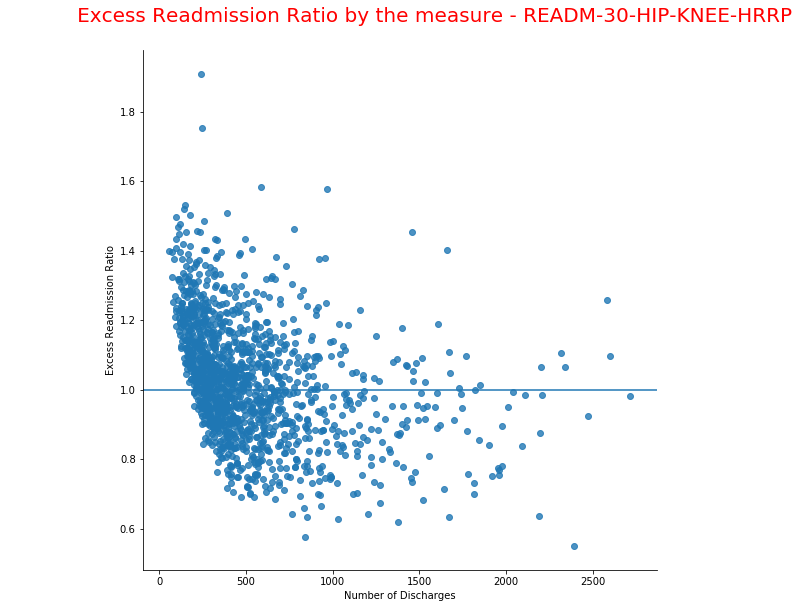

In [15]:
# Let us look at the data relationship of Number of Discharges with Excess Readmission Ratio of measure 'READM-30-HIP-KNEE-HRRP'
just_data=df[df['Measure Name']=='READM-30-HIP-KNEE-HRRP'][['Number of Discharges','Excess Readmission Ratio']]
sns.lmplot('Number of Discharges','Excess Readmission Ratio',just_data,fit_reg=False,height=8)
plt.title("           Excess Readmission Ratio by the measure - READM-30-HIP-KNEE-HRRP\n", color='r',size=20)
plt.axhline(y=1)
plt.show()



# insight: The number of discharges has some impact on the number of discharges. Let's calculate correlation in the next cell

In [16]:
# Now calculate the correlation of number of discharges and excess readmission ratios for whole dataset as well as individual
# measure dataset

# Whole dataset
cor_whole=np.corrcoef(df['Number of Discharges'],df['Excess Readmission Ratio'])

cor_HIP=np.corrcoef(HIP['Number of Discharges'],HIP['Excess Readmission Ratio'])
cor_AMI=np.corrcoef(AMI['Number of Discharges'],AMI['Excess Readmission Ratio'])
cor_HF=np.corrcoef(HF['Number of Discharges'],HF['Excess Readmission Ratio'])
cor_PN=np.corrcoef(PN['Number of Discharges'],PN['Excess Readmission Ratio'])
cor_COPD=np.corrcoef(COPD['Number of Discharges'],COPD['Excess Readmission Ratio'])
print ('correlation for whole dataset')
print ('correlation of number of discharges and excess admission ratio  for whole dataset: ', cor_whole[0,1])
print ('for individual measures')
print ('correlation of number of discharges and excess admission ratio  READM-30-HIP-KNEE-HRRP: ', cor_HIP[0,1])
print ('correlation of number of discharges and excess admission ratioREADM-30-AMI-HRRP: ', cor_AMI[0,1])
print ('correlation of number of discharges and excess admission ratioREADM-30-HF-HRRP: ', cor_HF[0,1])
print ('correlation of number of discharges and excess admission ratioREADM-30-PN-HRRP: ', cor_PN[0,1])
print ('correlation of number of discharges and excess admission ratioREADM-30-COPD-HRRP: ', cor_COPD[0,1])

# We can conclude that the measure - READM-30-HIP-KNEE-HRRP - trending down by a very small amound with the increasing number of
# discharges as ).35 is still very week relationshp.

correlation for whole dataset
correlation of number of discharges and excess admission ratio  for whole dataset:  -0.09309554287590438
for individual measures
correlation of number of discharges and excess admission ratio  READM-30-HIP-KNEE-HRRP:  -0.36094969197690263
correlation of number of discharges and excess admission ratioREADM-30-AMI-HRRP:  -0.14513375987601282
correlation of number of discharges and excess admission ratioREADM-30-HF-HRRP:  -0.036800049182768926
correlation of number of discharges and excess admission ratioREADM-30-PN-HRRP:  0.024738118756236452
correlation of number of discharges and excess admission ratioREADM-30-COPD-HRRP:  0.10736626870979392


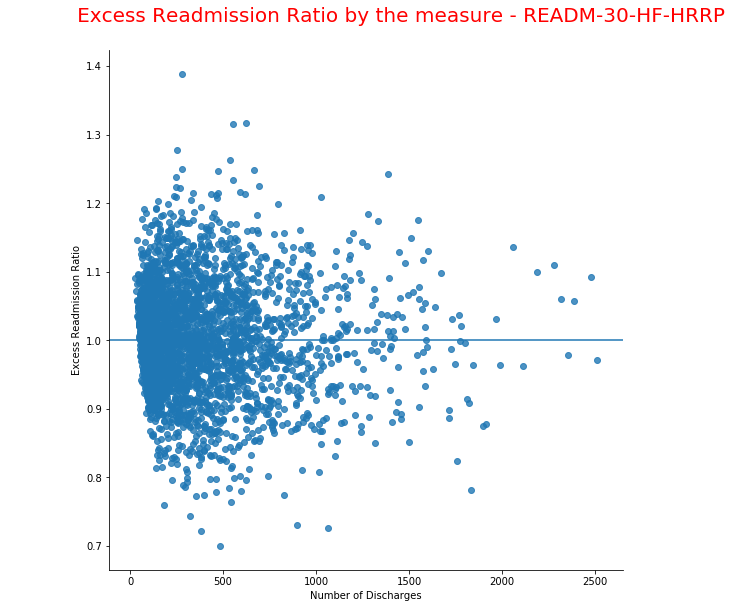

In [17]:
# Let us look at the data relationship of Number of Discharges with Excess Readmission Ratio of measure 'READM-30-HF-HRRP'
# which has a very low correlation
just_data=df[df['Measure Name']=='READM-30-HF-HRRP'][['Number of Discharges','Excess Readmission Ratio']]
sns.lmplot('Number of Discharges','Excess Readmission Ratio',just_data,fit_reg=False,height=8)
plt.title("           Excess Readmission Ratio by the measure - READM-30-HF-HRRP\n", color='r',size=20)
plt.axhline(y=1)
plt.show()

Text(0.5, 0, 'Excess Readmission Ratio')

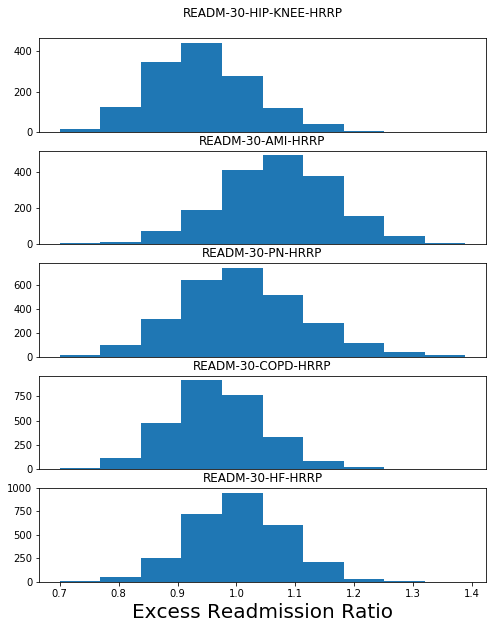

In [18]:
# islote all groups based measure name and check for normality

AMI=df[df['Measure Name']=='READM-30-AMI-HRRP'][['Measure Name','Excess Readmission Ratio']]
HF= df[df['Measure Name']=='READM-30-HF-HRRP'][['Measure Name','Excess Readmission Ratio']]
PN=df[df['Measure Name']=='READM-30-PN-HRRP'][['Measure Name','Excess Readmission Ratio']]
COPD=df[df['Measure Name']=='READM-30-COPD-HRRP'][['Measure Name','Excess Readmission Ratio']]
HIP=df[df['Measure Name']=='READM-30-HIP-KNEE-HRRP'][['Measure Name','Excess Readmission Ratio']]
#plt.boxplot(AMI['Excess Readmission Ratio'])
#d=np.arange(0,1,.02)
plt.figure(figsize=(8,10)) 
plt.subplot(5, 1, 1) 
plt.hist(HIP['Excess Readmission Ratio'])
plt.title("READM-30-HIP-KNEE-HRRP\n")
plt.xticks(())


plt.subplot(5,1,2)

plt.hist(AMI['Excess Readmission Ratio'])
plt.title('\nREADM-30-AMI-HRRP')
#plt.xlabel("Excess Readmission Ratio")
plt.xticks(())

plt.subplot(5,1,3)
plt.hist(PN['Excess Readmission Ratio'])
plt.title('\n\nREADM-30-PN-HRRP')
#plt.xlabel("Excess Readmission Ratio", rotation=45)
plt.xticks(())

plt.subplot(5,1,4)
plt.hist(COPD['Excess Readmission Ratio'])
plt.title('READM-30-COPD-HRRP')
plt.xticks(())

plt.subplot(5,1,5)
plt.hist(HF['Excess Readmission Ratio'])
plt.title('READM-30-HF-HRRP')
plt.xlabel('Excess Readmission Ratio', size=20)
#Since plots below show that all measures are approximately normal distribution, we can perform a few statistical tests.

In [19]:
# islote all groups again based measures and caclulate means of Number of discharges

AMI=df[df['Measure Name']=='READM-30-AMI-HRRP'][['Measure Name','Number of Discharges','Excess Readmission Ratio']]
HF= df[df['Measure Name']=='READM-30-HF-HRRP'][['Measure Name','Number of Discharges','Excess Readmission Ratio']]
PN=df[df['Measure Name']=='READM-30-PN-HRRP'][['Measure Name','Number of Discharges','Excess Readmission Ratio']]
COPD=df[df['Measure Name']=='READM-30-COPD-HRRP'][['Measure Name','Number of Discharges','Excess Readmission Ratio']]
HIP=df[df['Measure Name']=='READM-30-HIP-KNEE-HRRP'][['Measure Name','Number of Discharges','Excess Readmission Ratio']]
##print ("AMI mean Number of Discharges ",AMI.describe())
#print ("HF mean Number of Discharges ",HF.describe())
#print ("PN mean Number of Discharges ",PN.describe())
#print ("COPD mean Number of Discharges ",COPD.describe())
#print ("HIP mean Number of Discharges ",HIP.describe())

In [20]:
#Now perform two sample t-test 

## Import the packages and perform few statistical two-sample tests for each pair
import numpy as np
from scipy import stats
from itertools import combinations 
measure_name=list(df['Measure Name'].unique())

t2, p2 = stats.ttest_ind(PN['Excess Readmission Ratio'],HF['Excess Readmission Ratio'])
print('measure names: ',measure_name[0],'and',measure_name[1],"\nt = " + str(t2), "p = " + format(p2,'.9f'))
print ('CONCLUSION: ')
if p2>0.05:
    print ('reject null hypothesis')
else:
    print ('accept null hypothesis')
print ('')

t2, p2 = stats.ttest_ind(HIP['Excess Readmission Ratio'],HF['Excess Readmission Ratio'])
print('measure names: ',measure_name[4],'and',measure_name[1],"\nt = " + str(t2), "p = " + format(p2,'.9f'))
print ('CONCLUSION: ')
if p2>0.05:
    print ('reject null hypothesis')
else:
    print ('accept null hypothesis')
print ('')

t2, p2 = stats.ttest_ind(HIP['Excess Readmission Ratio'],COPD['Excess Readmission Ratio'])
print('measure names: ',measure_name[4],'and',measure_name[3],"\nt = " + str(t2), "p = " + format(p2,'.9f'))
print ('CONCLUSION: ')
if p2>0.05:
    print ('reject null hypothesis')
else:
    print ('accept null hypothesis')
print ('')

t2, p2 = stats.ttest_ind(PN['Excess Readmission Ratio'],COPD['Excess Readmission Ratio'])
print('measure names: ',measure_name[2],'and',measure_name[3],"\nt = " + str(t2), "p = " + format(p2,'.9f'))
print ('CONCLUSION: ')
if p2>0.05:
    print ('reject null hypothesis')
else:
    print ('accept null hypothesis')


measure names:  READM-30-AMI-HRRP and READM-30-HF-HRRP 
t = 0.645110969316275 p = 0.518881614
CONCLUSION: 
reject null hypothesis

measure names:  READM-30-HIP-KNEE-HRRP and READM-30-HF-HRRP 
t = 6.390774802997117 p = 0.000000000
CONCLUSION: 
accept null hypothesis

measure names:  READM-30-HIP-KNEE-HRRP and READM-30-COPD-HRRP 
t = 6.438561825908091 p = 0.000000000
CONCLUSION: 
accept null hypothesis

measure names:  READM-30-PN-HRRP and READM-30-COPD-HRRP 
t = 0.258583952899349 p = 0.795965917
CONCLUSION: 
reject null hypothesis


In [21]:
#Percent of observations included in the original report to show the mean number of discharges above 1,000 and below 100
count_1000=df[df['Number of Discharges']>1000]
count_100=df[df['Number of Discharges']<100]
percent_1000=(count_1000['Number of Discharges'].count())/df['Number of Discharges'].count()*100
percent_100=(count_100['Number of Discharges'].count())/df['Number of Discharges'].count()*100

print ('percent > 1000 ', percent_1000, ', percent < 100 ', percent_100)
         


percent > 1000  4.00208804593701 , percent < 100  10.33582738820254


Preliminary Report Critique

The plot does not suggest what the report claimed. The excess readmission rate is not trending down with the increasing number of discharges.  (In this context, it is to be noted that the report assumed that the number of discharges in directly related to the capacity of the facility.) The number of discharges seems to have no impact on the excess rate of readmission ratio. The rate of readmission rate more or less equally distributed around the excess readmission ratio of value 1. Furthermore,  a few observations (less than ten percent on each of the shaded regions)  fall on red shaded area as well green shaded area but these numbers are not strong enough to claim a greater incidence of excess readmission ratio with increasing number of discharges or a lower number of discharges has a higher number of excess readmission ratio.

The statistics provided in the report is also misleading as only 10% of observations have number of discharges less than 100 and only 4% of observations have number of discharges are more than 1,000. So any conclusion or insight about the distribution of excess readmission ratio based on such a small number of discharges lacks the valid statistical claims.

Based on the above discussion, it can be seen that the conclusions reached by the report fail to provide a guideline for statistical validity.

My Report

It is assumed that the capacity of a facility is directly related to the number of discharges. 

During data wrangling three outliers were detected and deleted from the dataset. Also 80 observations came with number of discharges missing were deleted from the final dataset.

After initial visual observations, it appears that the excess readmission ratio has no impact on the number of discharges rather indicate that the rate of readmission ratio more or less equally distributed around the excess readmission ratio of value 1. Then we looked at the relationship of individual measures - the relationship between excess readmission ratios with the number of discharges. It appears that the measure READM-30-HIP-KNEE-HRRP has the highest rate of excess readmission ratios and values are heavily concentrated on the lower side of number of discharges. We also look at the correlation of the number of discharges with the excess readmission ratios for all measures, which shows that the correlation for all measures is very weak (less than negative 11 percent) except the measure READM-30-HIP-KNEE-HRRP (- 33%), still maybe considered weak. 

Then we performed statistical test analysis using t-test. We computed value of two sample test between measures at 1% of significant level as well as look at the p values. We set up the null hypothesis that all measures’ (two measures at a time) have excess readmission ratios have no difference with an alternative hypothesis that they are different. It turns out the only the measure READM-30-HIP-KNEE-HRRP is highly significant (with p values closer to 0) with all other measures separately; but the other measures are not significant between them (with reasonably high P values about .5).

The statistical and practical test significance have implications. The practical significance is more or less context bound. We do not want to punish the innocent but we can tolerate guilty goes unpunished.

As alternative visual plots, we used heatmap and line plots to look at the relationship between the excess readmission ratios and the number of discharges. With heatmaps, the color bar can display the intensity of the relation under investigation and the line plot can indicate the trend of relationship clearly. The scatter diagram can display relationship very clearly when the relationship is even not linear but the visual complexion is sometimes incomprehensible.

To conclude, the hospitals may focus on hip and knee surgery measure. It has highest number of excess readmission ratios even with lower number of discharges. Since the recovery from any surgery heavily depends on the attention and maintenance of the patients, the facility should make sure the patients perform their out of facility instructions carefully. 




